In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Task 1

In [172]:
a=1 #границы отрезка
n=8 #колво узлов

In [3]:
def f(x):
    return (x**2 + 4*np.sin(x) - 2)

In [4]:
#подсчет коэффициентов полинома Лагранжа
def l_k(x, k, X):
    l=1
    for i in range(len(X)):
        if i!=k:
            l*=(x-X[i])/(X[k]-X[i])
    return l

In [5]:
# полином Лагранжа. Х-узлы
def L1(x,X): 
    L=0
    for i in range(len(X)):
        L+=l_k(x,i,X)*f(X[i])
    return L       

In [6]:
# поиск корней полинома Чебышева
def Ch(n,a):
    X=[]
    for i in range(n):
        X.append(a*np.cos((2*i+1)/(2*n)*np.pi))
    return X

In [7]:
x=np.linspace(-a,a,num=100)
X=np.linspace(-a,a, num=n)
X_Ch=Ch(n,a)

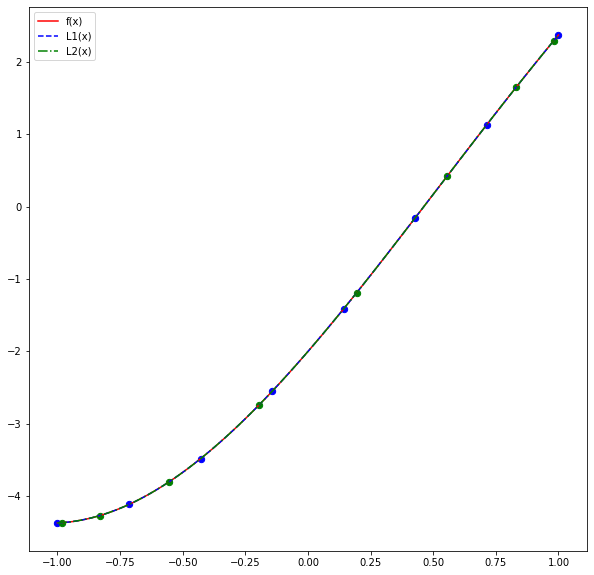

In [8]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, [f(_) for _ in x],'r-', label = 'f(x)')
plt.plot(x, L1(x,X), 'b--', label = 'L1(x)')
plt.plot(x, L1(x,X_Ch), 'g-.', label='L2(x)')
plt.scatter(X, L1(X,X), color='blue', s=40, marker='o')
plt.scatter(X_Ch, L1(X_Ch,X_Ch), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

In [9]:
# подсчет погрешности
def E1(x,X):
    max=0
    for i in x:
        diff=abs(f(i)-L1(i,X))
        if diff>max:
            max=diff
    return max        

In [10]:
print(E1(x,X),E1(x,X_Ch))

2.801459060286504e-07 8.379663185564823e-08


In [11]:
N=np.random.choice(np.arange(3,12), size=5, replace=False) 
print('N\t',end=' ')
for i in N:
    print(i,'\t\t\t', end=' ')
print('\nL_p\t', end='')
for i in N:
    X=np.linspace(-a,a, num=i)
    print(E1(x,X),'\t', end='')
print('\nL_Ch\t', end='')
for i in N:
    X_Ch=Ch(i,a)
    print(E1(x,X_Ch),'\t', end='')

N	 8 			 7 			 10 			 5 			 11 			 
L_p	2.801459060286504e-07 	3.3577677897689284e-05 	1.1606573480094085e-09 	0.003611811792444186 	8.3639140058267e-10 	
L_Ch	8.379663185564823e-08 	1.2063631528835828e-05 	1.9137358364673673e-10 	0.0020169372115135253 	9.603176587269502e-11 	

# Task 2

In [12]:
def h(x):
    return f(x)*abs(x)

In [13]:
# полином Лагранжа. Х-узлы
def L2(x,X): 
    L=0
    for i in range(len(X)):
        L+=l_k(x,i,X)*h(X[i])
    return L   

In [14]:
# подсчет погрешности
def E2(x,X):
    max=0
    for i in x:
        diff=abs(h(i)-L2(i,X))
        if diff>max:
            max=diff
    return max  

In [16]:
x=np.linspace(-a,a,num=200)
N=np.random.choice(np.arange(3,12), size=5, replace=False)      #np.random.randint(3, 12, )
print('N\t',end=' ')
for i in N:
    print(i,'\t\t\t', end=' ')
print('\nL_p\t', end='')
for i in N:
    X=np.linspace(-a,a, num=i)
    print(E2(x,X),'\t', end='')
print('\nL_Ch\t', end='')
for i in N:
    X_Ch=Ch(i,a)
    print(E2(x,X_Ch),'\t', end='')

N	 10 			 7 			 8 			 9 			 5 			 
L_p	0.35790055523742215 	0.44681233505537055 	0.24887024861101947 	0.7043294954645216 	0.47894185739372874 	
L_Ch	0.19724641122727996 	0.24844062689407392 	0.25313578697329425 	0.175775569169918 	0.43162033237868735 	

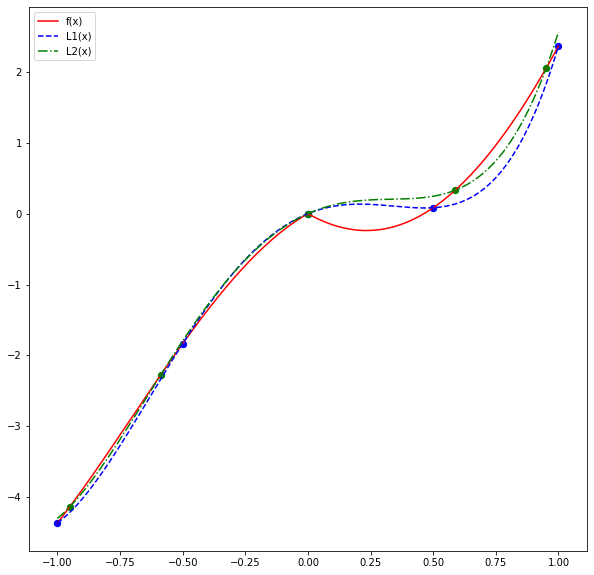

In [17]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, [h(_) for _ in x],'r-', label = 'f(x)')
plt.plot(x, L2(x,X), 'b--', label = 'L1(x)')
plt.plot(x, L2(x,X_Ch), 'g-.', label='L2(x)')
plt.scatter(X, L2(X,X), color='blue', s=40, marker='o')
plt.scatter(X_Ch, L2(X_Ch,X_Ch), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

# TASK 3

In [18]:
def f_1(x):
    return (2*x + 4*np.cos(x))

In [19]:
def f_2(x):
    return (2-4*np.sin(x))

In [20]:
def f_3(x):
    return (-4*np.cos(x))

In [187]:
F=[f,f_1]

In [183]:
def DividedDifference(X, df, m):
    n=len(X)
    dd=np.zeros((n*m, n*m)) # matrix of divided difference
    z=np.zeros(n*m)
    k=0 # row index
    for i in range(n):
        for j in range(m):
            k=i*m+j
            z[k]=X[i]
            dd[k,0]=df[i,0] #float("{0:.3f}".format(df[i,0]))
            for l in range(1,k+1):
                if (dd[k,l-1]==dd[k-1,l-1]) and (z[k]==z[k-l]):
                    dd[k,l]=df[i, l] / math.factorial(l)
                else:
                    dd[k,l]=(dd[k, l - 1] - dd[k - 1, l - 1])/(z[k]-z[k-l])
    return dd

In [188]:
def Hermite(x,X):
    m=len(F)-1
    n=len(X)  # n data points, m derivatives
    # derivative matrix
    matrix=np.zeros((n,m)) 
    for i in range(n):
        for j in range(m):
            matrix[i,j]=F[j](X[i])
    dd=DividedDifference(X,matrix,m)
    P=0
    u=1
    for i in range(n):
        for j in range(0,m):
            l=i*m+j # index of the coefficient 
            P+=dd[l,l]*u  
        u*=(x-X[i])
    return P

In [189]:
X=np.linspace(-a,a, num=3)
x=np.linspace(-a,a,num=200)
P=Hermite(x,X)

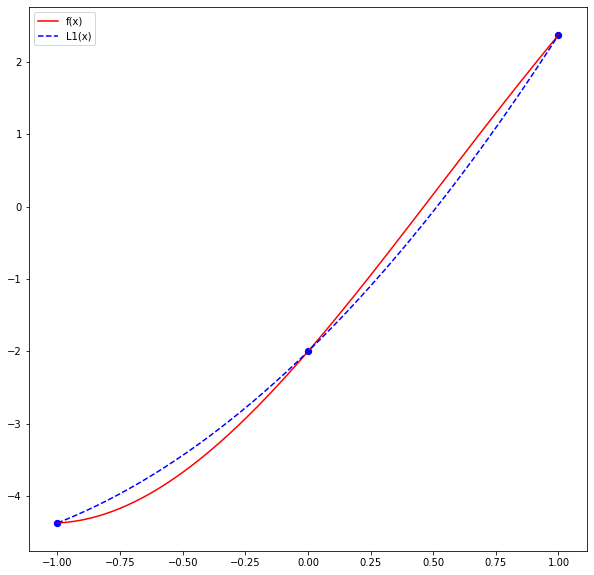

In [190]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, f(x),'r-', label = 'f(x)')
plt.plot(x, Hermite(x,X), 'b--', label = 'L1(x)')
# plt.plot(x, L2(x,X_Ch), 'g-.', label='L2(x)')
plt.scatter(X, Hermite(X,X), color='blue', s=40, marker='o')
# plt.scatter(X_Ch, L2(X_Ch,X_Ch), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()